In [1]:
import numpy as np
from nldpy import DynamicalSystem
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'grid', 'notebook'])

In [2]:
def pendulum(t, state_vector, params):
    gamma, omega0 = params
    x, v = state_vector

    dxdt = v
    dvdt = -omega0**2*x - 2*gamma*v

    return np.array([dxdt, dvdt])

def pendulum_theor(t, ic, params):
    gamma, omega0 = params
    x0, v0 = ic

    omega = np.sqrt(omega0**2 - gamma**2)
    A = np.sqrt(x0**2 + ((v0 + gamma*x0)/omega0)**2)
    phi0 = np.atan(x0*omega0/(v0 + gamma*x0))
    Omega = np.sqrt(omega**2 + gamma**2)
    psi = np.atan(omega/gamma)

    x = A*np.exp(-gamma*t)*np.sin(omega*t + phi0)
    v = -Omega*A*np.exp(-gamma*t)*np.sin(omega*t + phi0 - psi)

    return x, v

In [3]:
p = [0.05, 1]
x0 = [0, 1]
t0 = 0

In [9]:
sys = DynamicalSystem(pendulum, t0, x0, p)
sys.dt = 1e-3

In [12]:
sys.integrate(100, 0)

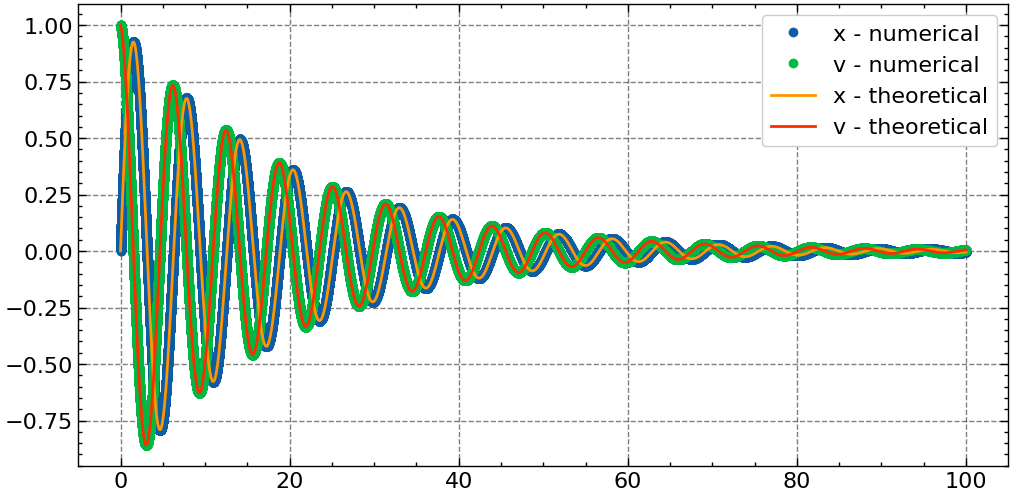

In [13]:
plt.figure(figsize=(12, 6))

x, v = pendulum_theor(sys.t_sol, x0, p) 

plt.plot(sys.t_sol, sys.x_sol[0], 'o', label='x - numerical')
plt.plot(sys.t_sol, sys.x_sol[1], 'o', label='v - numerical')
plt.plot(sys.t_sol, x, label='x - theoretical')
plt.plot(sys.t_sol, v, label='v - theoretical')

plt.legend()

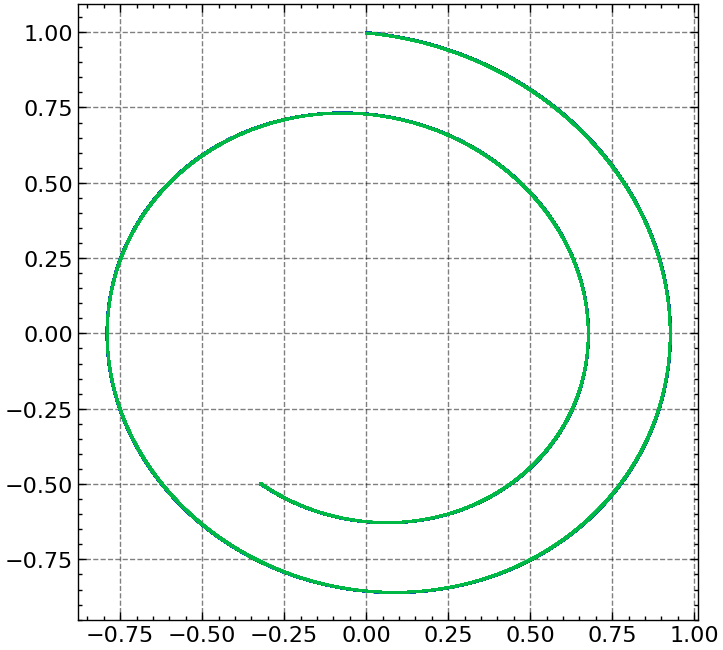

In [8]:
plt.figure(figsize=(8,8))

plt.scatter(sys.x_sol[0], sys.x_sol[1], s=1)
plt.scatter(x, v, s=0.5)

In [6]:
x = np.ones((10,2))
x

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [8]:
x[0]

array([1., 1.])